<a href="https://colab.research.google.com/github/usamaamjadarain/fastai2.ipython/blob/main/ImagesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai -q --upgrade

     |████████████████████████████████| 194kB 5.9MB/s 
     |████████████████████████████████| 12.8MB 231kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [2]:
from fastai.vision.all import *

In [3]:
URLs.CARS

'https://s3.amazonaws.com/fast-ai-imageclas/stanford-cars.tgz'

In [4]:
path = untar_data(URLs.CARS)

In [7]:
path.ls()

(#3) [Path('/root/.fastai/data/stanford-cars/cars_test'),Path('/root/.fastai/data/stanford-cars/cars_train'),Path('/root/.fastai/data/stanford-cars/cars_annos.mat')]

In [8]:
np.random.seed(2)

In [9]:
img_dir = '/root/.fastai/data/stanford-cars/cars_train'
path = Path(img_dir)
path.ls()

(#8144) [Path('/root/.fastai/data/stanford-cars/cars_train/07486.jpg'),Path('/root/.fastai/data/stanford-cars/cars_train/05541.jpg'),Path('/root/.fastai/data/stanford-cars/cars_train/02824.jpg'),Path('/root/.fastai/data/stanford-cars/cars_train/06433.jpg'),Path('/root/.fastai/data/stanford-cars/cars_train/01008.jpg'),Path('/root/.fastai/data/stanford-cars/cars_train/00127.jpg'),Path('/root/.fastai/data/stanford-cars/cars_train/03534.jpg'),Path('/root/.fastai/data/stanford-cars/cars_train/00903.jpg'),Path('/root/.fastai/data/stanford-cars/cars_train/04665.jpg'),Path('/root/.fastai/data/stanford-cars/cars_train/05651.jpg')...]

In [10]:
tfms = aug_transforms(do_flip = True, flip_vert = False, mult=2.0)

In [11]:
item_tfms=RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))


In [13]:

data = ImageDataLoaders.from_folder(f'{path}',valid_pct=0.2,size = 224,bs = 64, batch_tfms=tfms,item_tfms= item_tfms)


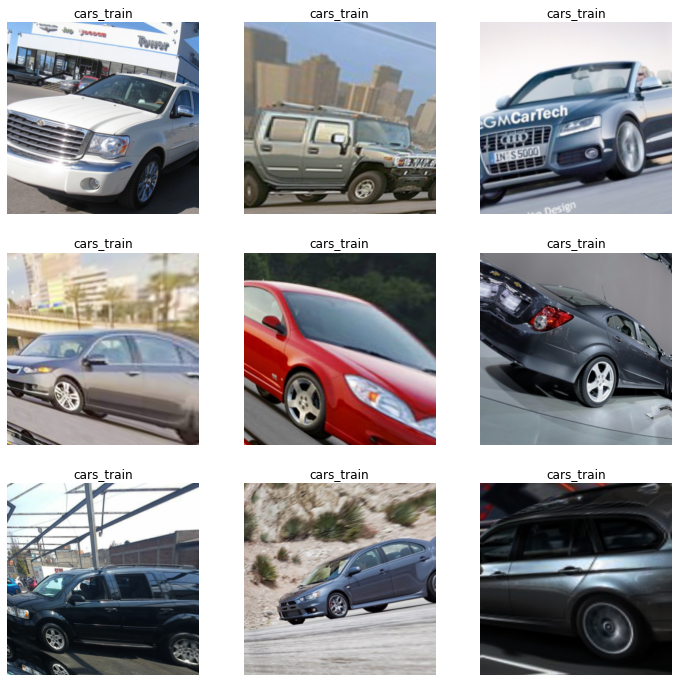

In [14]:
data.show_batch(max_n=9, figsize=(12,12))

THEN WE WILL CREATE DATABLOCK

In [15]:
Data = DataBlock( blocks=(ImageBlock, CategoryBlock), get_items=get_image_files, 
splitter=RandomSplitter(valid_pct=0.2, seed=42), get_y=parent_label, item_tfms=Resize(128))
dls = Data.dataloaders(path)

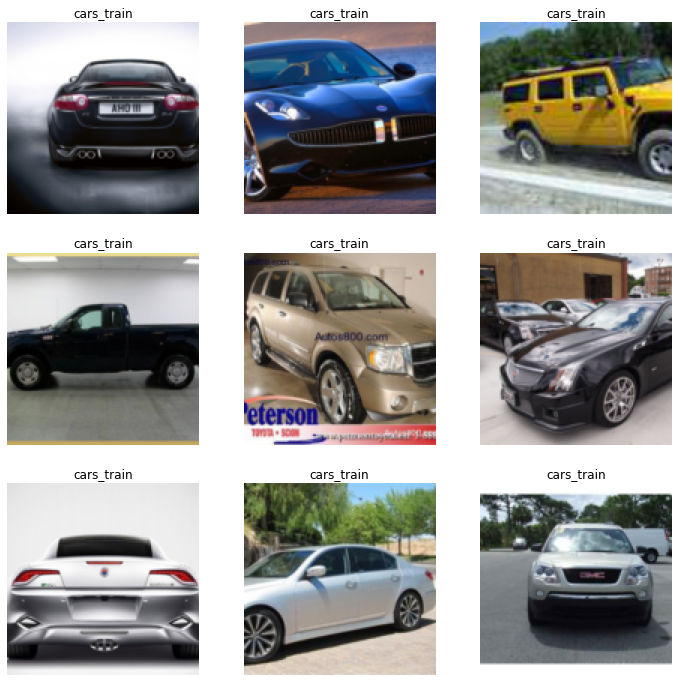

In [16]:
dls.show_batch(max_n=9,figsize=(12,12))

In [17]:
learn = cnn_learner(dls,resnet34,metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [18]:
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 64   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                      

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=6.309573450380412e-07)

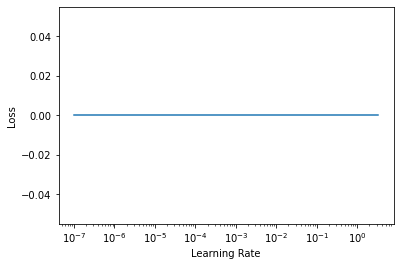

In [19]:
learn.lr_find()

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.000000,0.000000,1.000000,01:30
1,0.000000,0.000000,1.000000,01:30
2,0.000000,0.000000,1.000000,01:31
3,0.000000,0.000000,1.000000,01:30


In [21]:
learn = cnn_learner(dls,resnet34,metrics=[error_rate])

In [22]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,01:30
1,0.000000,0.000000,0.000000,01:30
2,0.000000,0.000000,0.000000,01:30
